# Caso: Tratados Bilaterales de Inversión entre Países que conforman APEC

Integrante:
- Luis Alberto Pacheco Concha (20175910)

<p style="text-align: justify;">
Para el presente caso utilizaremos la información sobre el establecimiento de acuerdos bilaterales de inversión haciendo uso de la base de datos del Centro Internacional de Arreglo de Diferencias Relativas a Inversiones (CIADI).

A través de scrapping, extrajimos los [tratados por año de firma desde 1959 hasta 2019](https://icsid.worldbank.org/es/recursos/base-de-datos/base-de-datos-de-Tratados-Bilaterales-de-Inversi%C3%B3n).

La justificación recae en que, en la literatura actual, se sostiene que la conformación de APEC, con su modelo de regionalismo abierto, ha permitido el establecimiento de relaciones comerciales entre países distantes del Asia Pacífico, permitiendo principalmente la conformación de tratados de libre comercio e inversión entre las diferentes economías. De esta manera, surge la cuestión de en qué forma la relación se ha establecido entre los diferentes países y en qué medida ha facilitado la coperación Norte Sur. Es decir, entre los países más desarrollados y los países emergentes. Asimismo, se pretende evaluar a qué países ha favorecido la cooperación y qué tipo de red se ha conformado entre estos.

De esta forma, se plantea un objetivo principal: identificar la evolución de a dinámica de inversión entre los países pertenecientes al Asia Pacífico en los últimos 30 años. Con ello, podremos identificar si es que la evolución ha sido positiva y ha favorecido la cooperación como indican los académicos y establece APEC en sus lineamientos. Así también, se pretende evaluar cuáles son las economías más relevantes en la red, que permiten que mantega la fortaleza que tiene en la actualidad. 

He preprocesado los datos previamente. Abriremos el archivo en excel.
</p>

# 3.1 Preparar una red (dirigida o no dirigida) de su elección. (10 pts)

Procedemos a extraer la data que utilizaremos para el proyecto

In [431]:
from IPython.display import IFrame
IFrame("https://docs.google.com/spreadsheets/d/1siR-8WykwSYpd8fPCOWBTgqXu6_feva-uk6u3WB8WLs/edit?usp=sharing",1200,350)

In [432]:
import pandas as pd

# Enlace para descargar el archivo en formato .xlsx
LinkToData = "https://docs.google.com/spreadsheets/d/1siR-8WykwSYpd8fPCOWBTgqXu6_feva-uk6u3WB8WLs/export?format=xlsx"

# Leer el archivo .xlsx desde el enlace
Tratados = pd.read_excel(LinkToData)

# Mostrar los datos leídos
print(Tratados.head())

                                             Parties       Signature Date  \
0                                Kazakhstan / Latvia  2004-10-08 00:00:00   
1  Kazakhstan / United Kingdom of Great Britain a...  1995-11-23 00:00:00   
2                        Korea, Republic of / Mexico  2000-11-14 00:00:00   
3                      Korea, Republic of / Paraguay         Dec 22, 1992   
4                   Korea, Republic of / Philippines         Apr 07, 1994   

  Entry into Force Date Reference to ICSID  
0          Apr 21, 2006                yes  
1   1995-11-23 00:00:00                yes  
2   2002-06-28 00:00:00                yes  
3          Aug 06, 1993                yes  
4          Sep 25, 1996                yes  


In [433]:
# Validamos la cantidad de filas y columnas
nombres_columnas = Tratados.columns
print(nombres_columnas)
print(Tratados.shape)

Index(['Parties', 'Signature Date', 'Entry into Force Date',
       'Reference to ICSID'],
      dtype='object')
(2720, 4)


Efectivamente, la data se encuentra completa, entoces seguimos

In [435]:
# Renombrar las columnas
Tratados.rename(columns={
    'Parties': 'parties',
    'Signature Date': 'sig_date',
    'Entry into Force Date': 'entry_date',
    'Reference to ICSID': 'ICSID'
}, inplace=True)

#validamos el cambio de nombre
print(Tratados.columns)

Index(['parties', 'sig_date', 'entry_date', 'ICSID'], dtype='object')


In [436]:
# Convertir los valores de 'ICSID Ref' a 'Yes' o 'No', dejando solo 'Yes'
Tratados['ICSID'] = Tratados['ICSID'].str.strip().str.lower()  # Normalizar los valores
Tratados['ICSID'] = Tratados['ICSID'].replace(['yes'], 'Yes')  # Convertir 'yes' a 'Yes'
Tratados['ICSID'] = Tratados['ICSID'].replace(['no'], 'No')  # Convertir 'No' a 'No' (opcional)

In [437]:
# Reemplazar '/' por '-' en la columna 'Parties'
Tratados['parties'] = Tratados['parties'].str.replace('/', '-', regex=False)

In [438]:
#Validamos el cambio
Tratados.info()
Tratados.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2720 entries, 0 to 2719
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   parties     2720 non-null   object
 1   sig_date    2720 non-null   object
 2   entry_date  2137 non-null   object
 3   ICSID       2719 non-null   object
dtypes: object(4)
memory usage: 85.1+ KB


,parties,sig_date,entry_date,ICSID
0,Kazakhstan - Latvia,2004-10-08 00:00:00,"Apr 21, 2006",Yes
1,Kazakhstan - United Kingdom of Great Britain a...,1995-11-23 00:00:00,1995-11-23 00:00:00,Yes
2,"Korea, Republic of - Mexico",2000-11-14 00:00:00,2002-06-28 00:00:00,Yes
3,"Korea, Republic of - Paraguay","Dec 22, 1992","Aug 06, 1993",Yes
4,"Korea, Republic of - Philippines","Apr 07, 1994","Sep 25, 1996",Yes
5,"Korea, Republic of - Poland",1989-11-01 00:00:00,1990-02-02 00:00:00,Yes
6,"Korea, Republic of - Portugal",1995-05-03 00:00:00,"Aug 11, 1996",Yes
7,"Korea, Republic of - Romania","Aug 07, 1990","Dec 30, 1994",Yes
8,"Korea, Republic of - Senegal",1984-07-12 00:00:00,"Sep 02, 1985",Yes
9,"Korea, Republic of - Sweden","Aug 30, 1995",1997-06-18 00:00:00,Yes


In [439]:
print(Tratados.shape)

(2720, 4)


Debido a que trabajaremos con países de APEC, debemos realizar un filtrado para que los países de la columna parties pertenezcan a APEC como se sigue a continuación.

In [441]:
# Lista de países miembros de APEC
apec_countries = [
    "Australia", "Brunei Darussalam", "Canada", "Chile", "China", "Hong Kong",
    "Indonesia", "Japan", "Korea, Republic of", "Malaysia", "Mexico", "New Zealand",
    "Papua New Guinea", "Peru", "Philippines", "Russian", "Singapore", "China",
    "Thailand", "United States of America", "Vietnam"
]

# Función para filtrar los países APEC en la columna 'parties'
def filter_both_apec(row):
    countries = [c.strip() for c in row.split('-')]
    return all(country in apec_countries for country in countries)

# Filtrar el DataFrame donde ambos países en la columna 'parties' pertenezcan a APEC
Tratados_apec = Tratados[Tratados['parties'].apply(filter_both_apec)]

# Mostrar los primeros resultados
Tratados_apec.head()

,parties,sig_date,entry_date,ICSID
2,"Korea, Republic of - Mexico",2000-11-14 00:00:00,2002-06-28 00:00:00,Yes
4,"Korea, Republic of - Philippines","Apr 07, 1994","Sep 25, 1996",Yes
46,Philippines - Thailand,"Sep 30, 1995","Sep 06, 1996",Yes
120,"Korea, Republic of - Thailand",2002-03-24 00:00:00,"Sep 29, 2002",Yes
189,Mexico - Singapore,2009-11-12 00:00:00,"Apr 04, 2011",Yes


In [442]:
#valida que el dataframe sea correcto y sí se tienen las filas esperadas
Tratados_apec

,parties,sig_date,entry_date,ICSID
2,"Korea, Republic of - Mexico",2000-11-14 00:00:00,2002-06-28 00:00:00,Yes
4,"Korea, Republic of - Philippines","Apr 07, 1994","Sep 25, 1996",Yes
46,Philippines - Thailand,"Sep 30, 1995","Sep 06, 1996",Yes
120,"Korea, Republic of - Thailand",2002-03-24 00:00:00,"Sep 29, 2002",Yes
189,Mexico - Singapore,2009-11-12 00:00:00,"Apr 04, 2011",Yes
...,...,...,...,...
2483,Malaysia - Papua New Guinea,1992-10-27 00:00:00,NaN,No
2488,Malaysia - Vietnam,"Jan 21, 1992",NaN,No
2605,Singapore - Vietnam,1992-10-29 00:00:00,"Dec 25, 1992",No
2639,Thailand - Vietnam,1991-10-30 00:00:00,1992-02-07 00:00:00,No


In [443]:
print(Tratados_apec.parties)

2            Korea, Republic of - Mexico
4       Korea, Republic of - Philippines
46                Philippines - Thailand
120        Korea, Republic of - Thailand
189                   Mexico - Singapore
                      ...               
2483         Malaysia - Papua New Guinea
2488                  Malaysia - Vietnam
2605                 Singapore - Vietnam
2639                  Thailand - Vietnam
2667               Philippines - Vietnam
Name: parties, Length: 62, dtype: object


In [444]:
import pandas as pd

# Crear una copia explícita del DataFrame para evitar el SettingWithCopyWarning
Tratados_apec = Tratados_apec.copy()

# Convertir 'sig_date' a formato datetime y manejar errores
Tratados_apec['sig_date'] = pd.to_datetime(Tratados_apec['sig_date'], errors='coerce')

# Extraer el año de 'sig_date' y convertir a entero
Tratados_apec['sig_date'] = Tratados_apec['sig_date'].dt.year.astype('Int64')

# Mostrar los primeros registros actualizados
Tratados_apec.head()



,parties,sig_date,entry_date,ICSID
2,"Korea, Republic of - Mexico",2000,2002-06-28 00:00:00,Yes
4,"Korea, Republic of - Philippines",1994,"Sep 25, 1996",Yes
46,Philippines - Thailand,1995,"Sep 06, 1996",Yes
120,"Korea, Republic of - Thailand",2002,"Sep 29, 2002",Yes
189,Mexico - Singapore,2009,"Apr 04, 2011",Yes


In [445]:
Tratados_apec.shape

(62, 4)

# 3.2 Aplicar todos los cálculos que correspondan según lo visto en clase.(4pts)

Revisamos el tipo de acuerdo que tenemos disponible:

In [448]:
Tratados_apec.ICSID.value_counts()

ICSID
Yes    50
No     12
Name: count, dtype: int64

 Se debe tener en cuenta que ICSID refiere a si el tratado incluye una cláusula que permite que las disputas entre inversionistas extranjeros y el estado receptor sean resueltas a través del Centro Internacional de Arreglo de Diferencias Relativas a Inversiones (ICSID) del Grupo del Banco Mundial, mediante arbitraje o conciliación.

Por tanto, **sí incluímos a ambos**

Puedo crear una red de países. Permíteme crear "edges" utilizando "parties" del dataframe. Primero, déjame mostrarte cómo funcionan las combinaciones:

In [451]:
import pandas as pd
import networkx as nx
from itertools import combinations

<p align="center">
  <span style="font-size: 36px;">INICIAMOS ANÁLISIS PARA VER EL ESTADO DE LA RED PREVIO A 1989</span>
</p>

In [453]:
# Filtrar el DataFrame para incluir solo los registros donde 'sig_date' sea menor a 1989
tratados_pre_1989 = Tratados_apec[Tratados_apec['sig_date'] < 1989]

# Mostrar el nuevo DataFrame con los registros filtrados
print(tratados_pre_1989)


                  parties  sig_date           entry_date ICSID
576     Australia - China      1988  1988-07-11 00:00:00   Yes
990         China - Japan      1988  1989-05-14 00:00:00   Yes
996      China - Malaysia      1988  1990-03-31 00:00:00   Yes
1004  China - New Zealand      1988  1989-03-25 00:00:00   Yes
1017    China - Singapore      1985  1986-02-07 00:00:00   Yes
2077     China - Thailand      1985         Dec 13, 1985    No


In [454]:
from itertools import combinations
# Crear una lista para almacenar todas las combinaciones
all_combinations89 = []

# Iterar por cada fila de la columna 'parties' en el dataframe 'Tratados_apec'
for index, row in tratados_pre_1989.iterrows():
    parties_str = row['parties']

    # Separar los países por el guión ('-') y limpiarlos
    countries = [country.strip() for country in parties_str.split('-')]

    # Obtener las combinaciones de 2 países, ordenadas alfabéticamente
    combinations_per_row = list(combinations(sorted(countries), 2))

    # Agregar estas combinaciones a la lista total
    all_combinations89.extend(combinations_per_row)

# Mostrar todas las combinaciones generadas
all_combinations89



[('Australia', 'China'),
 ('China', 'Japan'),
 ('China', 'Malaysia'),
 ('China', 'New Zealand'),
 ('China', 'Singapore'),
 ('China', 'Thailand')]

Al ser tratados bilaterales, debemos comprobar que sea la misma cantidad de combinaciones que las que tenemos en las celdas

In [456]:
#se verifica que sí es la misma cantidad, entonces seguimos
total_combinations89 = len(all_combinations89)
total_combinations89

6

Todos los pares representan nodes y edges, entonces:

In [458]:
import networkx as nx

Framework_Agreement_Net_89 = nx.Graph(all_combinations89)

In [459]:
# vemos los edges
Framework_Agreement_Net_89.edges()

EdgeView([('Australia', 'China'), ('China', 'Japan'), ('China', 'Malaysia'), ('China', 'New Zealand'), ('China', 'Singapore'), ('China', 'Thailand')])

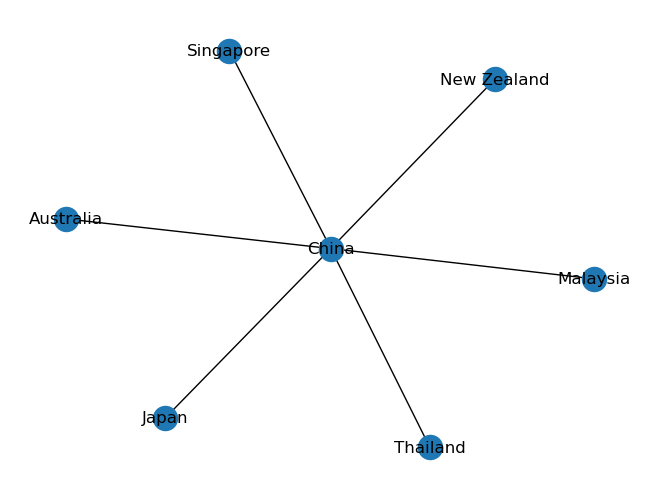

In [460]:
#draw the graph
nx.draw(Framework_Agreement_Net_89, with_labels=True)

A través del siguiente gráfico se observa que de los 4 países que actualmente pertecen a APEC, 3 de ellos tenían un TLC cy que el punto de conexión es China.

<p align="center">
  <span style="font-size: 36px;">ANÁLISIS 10 AÑOS DESPUÉS DE LA CREACIÓN 1989</span>
</p

In [463]:
# Filtrar el DataFrame para incluir solo los registros donde 'sig_date' sea menor a 1989
tratados_pre_2000 = Tratados_apec[Tratados_apec['sig_date'] < 2000]

In [464]:
from itertools import combinations
# Crear una lista para almacenar todas las combinaciones
all_combinations20 = []

# Iterar por cada fila de la columna 'parties' en el dataframe 'Tratados_apec'
for index, row in tratados_pre_2000.iterrows():
    parties_str = row['parties']

    # Separar los países por el guión ('-') y limpiarlos
    countries = [country.strip() for country in parties_str.split('-')]

    # Obtener las combinaciones de 2 países, ordenadas alfabéticamente
    combinations_per_row = list(combinations(sorted(countries), 2))

    # Agregar estas combinaciones a la lista total
    all_combinations20.extend(combinations_per_row)

# Mostrar todas las combinaciones generadas
all_combinations20

[('Korea, Republic of', 'Philippines'),
 ('Philippines', 'Thailand'),
 ('Malaysia', 'Peru'),
 ('Peru', 'Thailand'),
 ('Australia', 'Chile'),
 ('Australia', 'China'),
 ('Australia', 'Indonesia'),
 ('Australia', 'Papua New Guinea'),
 ('Australia', 'Peru'),
 ('Australia', 'Philippines'),
 ('Australia', 'Vietnam'),
 ('Canada', 'Philippines'),
 ('Canada', 'Thailand'),
 ('Chile', 'China'),
 ('Chile', 'Indonesia'),
 ('Chile', 'Korea, Republic of'),
 ('Chile', 'Malaysia'),
 ('Chile', 'New Zealand'),
 ('Chile', 'Philippines'),
 ('Chile', 'Vietnam'),
 ('China', 'Indonesia'),
 ('China', 'Japan'),
 ('China', 'Korea, Republic of'),
 ('China', 'Malaysia'),
 ('China', 'New Zealand'),
 ('China', 'Papua New Guinea'),
 ('China', 'Peru'),
 ('China', 'Singapore'),
 ('China', 'Vietnam'),
 ('Indonesia', 'Korea, Republic of'),
 ('Indonesia', 'Malaysia'),
 ('Indonesia', 'Thailand'),
 ('Korea, Republic of', 'Malaysia'),
 ('Korea, Republic of', 'Peru'),
 ('Korea, Republic of', 'Vietnam'),
 ('Australia', 'Hong K

In [465]:
#se verifica que sí es la misma cantidad, entonces seguimos
total_combinations20 = len(all_combinations20)
total_combinations20

47

Todos los pares representan nodes y edges, entonces:

In [467]:
import networkx as nx

Framework_Agreement_Net_20 = nx.Graph(all_combinations20)

In [468]:
# vemos los edges
Framework_Agreement_Net_20.edges()

EdgeView([('Korea, Republic of', 'Philippines'), ('Korea, Republic of', 'Chile'), ('Korea, Republic of', 'China'), ('Korea, Republic of', 'Indonesia'), ('Korea, Republic of', 'Malaysia'), ('Korea, Republic of', 'Peru'), ('Korea, Republic of', 'Vietnam'), ('Korea, Republic of', 'Hong Kong'), ('Philippines', 'Thailand'), ('Philippines', 'Australia'), ('Philippines', 'Canada'), ('Philippines', 'Chile'), ('Philippines', 'China'), ('Philippines', 'Vietnam'), ('Thailand', 'Peru'), ('Thailand', 'Canada'), ('Thailand', 'Indonesia'), ('Thailand', 'China'), ('Thailand', 'Vietnam'), ('Malaysia', 'Peru'), ('Malaysia', 'Chile'), ('Malaysia', 'China'), ('Malaysia', 'Indonesia'), ('Malaysia', 'Papua New Guinea'), ('Malaysia', 'Vietnam'), ('Peru', 'Australia'), ('Peru', 'China'), ('Australia', 'Chile'), ('Australia', 'China'), ('Australia', 'Indonesia'), ('Australia', 'Papua New Guinea'), ('Australia', 'Vietnam'), ('Australia', 'Hong Kong'), ('Chile', 'China'), ('Chile', 'Indonesia'), ('Chile', 'New Z

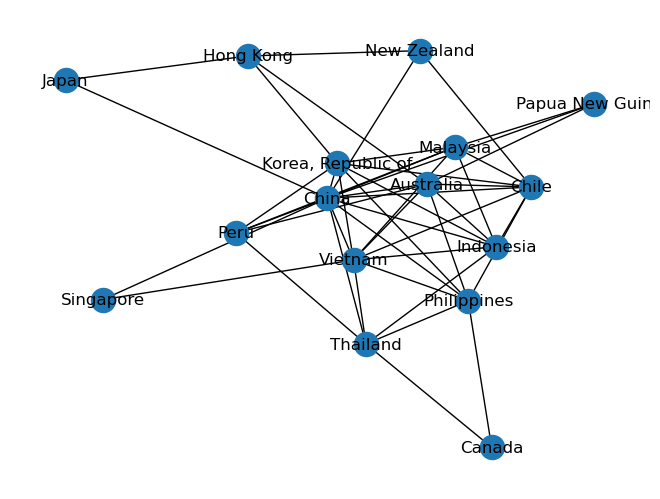

In [469]:
#draw the graph
nx.draw(Framework_Agreement_Net_20, with_labels=True)

<p align="center">
  <span style="font-size: 36px;">ANÁLISIS 20 AÑOS DESPUÉS DE LA CREACIÓN 1989</span>
</p

In [471]:
# Filtrar el DataFrame para incluir solo los registros donde 'sig_date' sea menor a 1989
tratados_pre_2010 = Tratados_apec[Tratados_apec['sig_date'] < 2010]

In [472]:
from itertools import combinations
# Crear una lista para almacenar todas las combinaciones
all_combinations2010 = []

# Iterar por cada fila de la columna 'parties' en el dataframe 'Tratados_apec'
for index, row in tratados_pre_2010.iterrows():
    parties_str = row['parties']

    # Separar los países por el guión ('-') y limpiarlos
    countries = [country.strip() for country in parties_str.split('-')]

    # Obtener las combinaciones de 2 países, ordenadas alfabéticamente
    combinations_per_row = list(combinations(sorted(countries), 2))

    # Agregar estas combinaciones a la lista total
    all_combinations2010.extend(combinations_per_row)

# Mostrar todas las combinaciones generadas
all_combinations2010

[('Korea, Republic of', 'Mexico'),
 ('Korea, Republic of', 'Philippines'),
 ('Philippines', 'Thailand'),
 ('Korea, Republic of', 'Thailand'),
 ('Mexico', 'Singapore'),
 ('Peru', 'Singapore'),
 ('Malaysia', 'Peru'),
 ('Peru', 'Thailand'),
 ('Australia', 'Chile'),
 ('Australia', 'China'),
 ('Australia', 'Indonesia'),
 ('Australia', 'Mexico'),
 ('Australia', 'Papua New Guinea'),
 ('Australia', 'Peru'),
 ('Australia', 'Philippines'),
 ('Australia', 'Vietnam'),
 ('Canada', 'Peru'),
 ('Canada', 'Philippines'),
 ('Canada', 'Thailand'),
 ('Chile', 'China'),
 ('Chile', 'Indonesia'),
 ('Chile', 'Korea, Republic of'),
 ('Chile', 'Malaysia'),
 ('Chile', 'New Zealand'),
 ('Chile', 'Peru'),
 ('Chile', 'Philippines'),
 ('Chile', 'Vietnam'),
 ('China', 'Indonesia'),
 ('China', 'Japan'),
 ('China', 'Korea, Republic of'),
 ('China', 'Malaysia'),
 ('China', 'Mexico'),
 ('China', 'New Zealand'),
 ('China', 'Papua New Guinea'),
 ('China', 'Peru'),
 ('China', 'Singapore'),
 ('China', 'Vietnam'),
 ('Indonesi

In [473]:
#se verifica que sí es la misma cantidad, entonces seguimos
total_combinations2010 = len(all_combinations2010)
total_combinations2010

60

Todos los pares representan nodes y edges, entonces:

In [475]:
import networkx as nx

Framework_Agreement_Net_2010 = nx.Graph(all_combinations2010)

In [476]:
# vemos los edges
Framework_Agreement_Net_2010.edges()

EdgeView([('Korea, Republic of', 'Mexico'), ('Korea, Republic of', 'Philippines'), ('Korea, Republic of', 'Thailand'), ('Korea, Republic of', 'Chile'), ('Korea, Republic of', 'China'), ('Korea, Republic of', 'Indonesia'), ('Korea, Republic of', 'Japan'), ('Korea, Republic of', 'Malaysia'), ('Korea, Republic of', 'Peru'), ('Korea, Republic of', 'Vietnam'), ('Korea, Republic of', 'Hong Kong'), ('Mexico', 'Singapore'), ('Mexico', 'Australia'), ('Mexico', 'China'), ('Philippines', 'Thailand'), ('Philippines', 'Australia'), ('Philippines', 'Canada'), ('Philippines', 'Chile'), ('Philippines', 'China'), ('Philippines', 'Vietnam'), ('Thailand', 'Peru'), ('Thailand', 'Canada'), ('Thailand', 'Indonesia'), ('Thailand', 'China'), ('Thailand', 'Hong Kong'), ('Thailand', 'Vietnam'), ('Singapore', 'Peru'), ('Singapore', 'China'), ('Singapore', 'Indonesia'), ('Singapore', 'Vietnam'), ('Peru', 'Malaysia'), ('Peru', 'Australia'), ('Peru', 'Canada'), ('Peru', 'Chile'), ('Peru', 'China'), ('Peru', 'Japan'

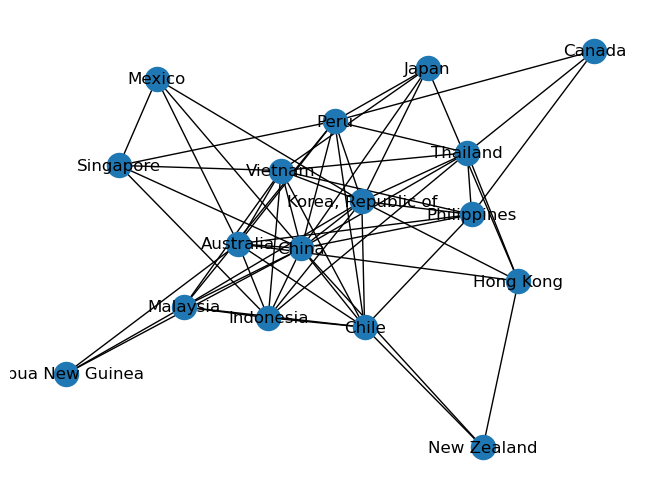

In [477]:
#draw the graph
nx.draw(Framework_Agreement_Net_2010, with_labels=True)

<p align="center">
  <span style="font-size: 36px;">ANÁLISIS 30 AÑOS DESPUÉS DE LA CREACIÓN 1989</span>
</p

In [479]:
# Filtrar el DataFrame para incluir solo los registros donde 'sig_date' sea menor a 1989
tratados_actual = Tratados_apec[Tratados_apec['sig_date'] > 0]

In [480]:
from itertools import combinations
# Crear una lista para almacenar todas las combinaciones
all_combinations2024 = []

# Iterar por cada fila de la columna 'parties' en el dataframe 'Tratados_apec'
for index, row in tratados_actual.iterrows():
    parties_str = row['parties']

    # Separar los países por el guión ('-') y limpiarlos
    countries = [country.strip() for country in parties_str.split('-')]

    # Obtener las combinaciones de 2 países, ordenadas alfabéticamente
    combinations_per_row = list(combinations(sorted(countries), 2))

    # Agregar estas combinaciones a la lista total
    all_combinations2024.extend(combinations_per_row)

# Mostrar todas las combinaciones generadas
all_combinations2024

[('Korea, Republic of', 'Mexico'),
 ('Korea, Republic of', 'Philippines'),
 ('Philippines', 'Thailand'),
 ('Korea, Republic of', 'Thailand'),
 ('Mexico', 'Singapore'),
 ('Peru', 'Singapore'),
 ('Malaysia', 'Peru'),
 ('Peru', 'Thailand'),
 ('Australia', 'Chile'),
 ('Australia', 'China'),
 ('Australia', 'Indonesia'),
 ('Australia', 'Mexico'),
 ('Australia', 'Papua New Guinea'),
 ('Australia', 'Peru'),
 ('Australia', 'Philippines'),
 ('Australia', 'Vietnam'),
 ('Canada', 'Peru'),
 ('Canada', 'Philippines'),
 ('Canada', 'Thailand'),
 ('Chile', 'China'),
 ('Chile', 'Indonesia'),
 ('Chile', 'Korea, Republic of'),
 ('Chile', 'Malaysia'),
 ('Chile', 'New Zealand'),
 ('Chile', 'Peru'),
 ('Chile', 'Philippines'),
 ('Chile', 'Vietnam'),
 ('China', 'Indonesia'),
 ('China', 'Japan'),
 ('China', 'Korea, Republic of'),
 ('China', 'Malaysia'),
 ('China', 'Mexico'),
 ('China', 'New Zealand'),
 ('China', 'Papua New Guinea'),
 ('China', 'Peru'),
 ('China', 'Singapore'),
 ('China', 'Vietnam'),
 ('Indonesi

In [481]:
#se verifica que sí es la misma cantidad, entonces seguimos
total_combinations2024 = len(all_combinations2024)
total_combinations2024

61

Todos los pares representan nodes y edges, entonces:

In [483]:
import networkx as nx

Framework_Agreement_Net_2024 = nx.Graph(all_combinations2024)

In [484]:
# vemos los edges
Framework_Agreement_Net_2024.edges()

EdgeView([('Korea, Republic of', 'Mexico'), ('Korea, Republic of', 'Philippines'), ('Korea, Republic of', 'Thailand'), ('Korea, Republic of', 'Chile'), ('Korea, Republic of', 'China'), ('Korea, Republic of', 'Indonesia'), ('Korea, Republic of', 'Japan'), ('Korea, Republic of', 'Malaysia'), ('Korea, Republic of', 'Peru'), ('Korea, Republic of', 'Vietnam'), ('Korea, Republic of', 'Hong Kong'), ('Mexico', 'Singapore'), ('Mexico', 'Australia'), ('Mexico', 'China'), ('Philippines', 'Thailand'), ('Philippines', 'Australia'), ('Philippines', 'Canada'), ('Philippines', 'Chile'), ('Philippines', 'China'), ('Philippines', 'Vietnam'), ('Thailand', 'Peru'), ('Thailand', 'Canada'), ('Thailand', 'Indonesia'), ('Thailand', 'China'), ('Thailand', 'Hong Kong'), ('Thailand', 'Vietnam'), ('Singapore', 'Peru'), ('Singapore', 'China'), ('Singapore', 'Indonesia'), ('Singapore', 'Vietnam'), ('Peru', 'Malaysia'), ('Peru', 'Australia'), ('Peru', 'Canada'), ('Peru', 'Chile'), ('Peru', 'China'), ('Peru', 'Japan'

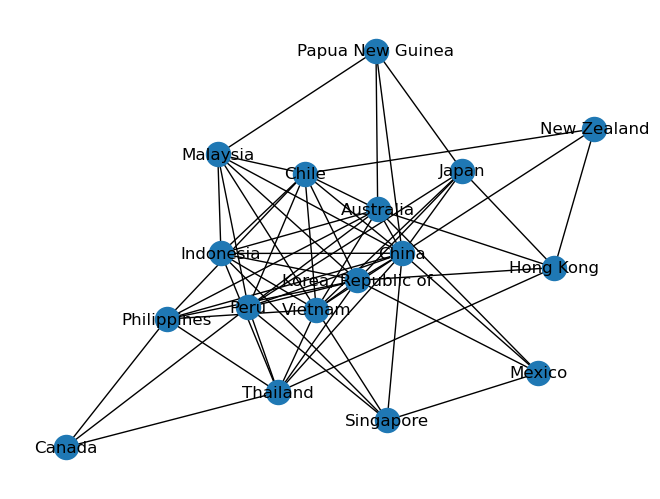

In [485]:
#draw the graph
nx.draw(Framework_Agreement_Net_2024, with_labels=True)

# 3.1 Crear un párrafo final donde resalta lo más relevante que ha encontrado. (2 pts)

Para hacer el análisis, visulizaremos la evolución de la dinámica de tratados bilaterales en los úlitmos 30 años. Para ello, ejecutamos el siguiente código:

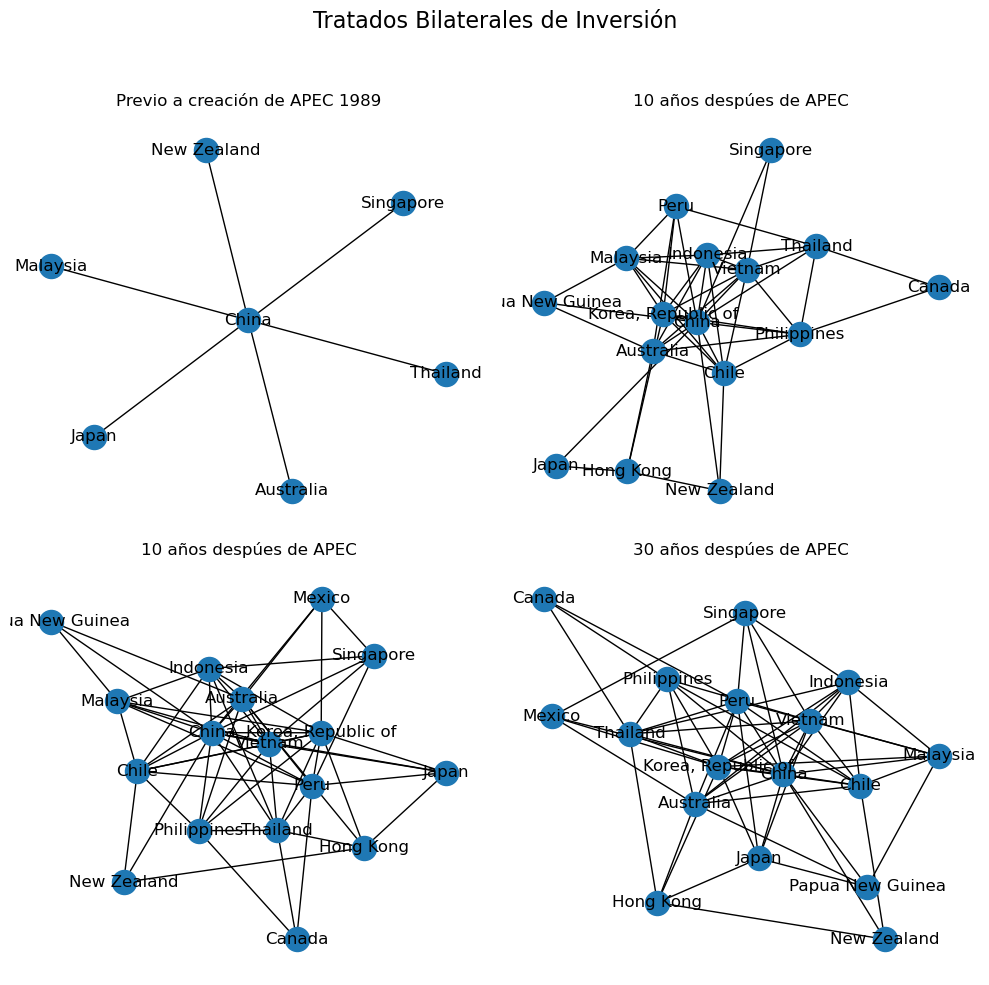

In [488]:
import matplotlib.pyplot as plt
import networkx as nx

# Crear una figura y una cuadrícula de subplots de 2x2
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Asignar cada gráfico a su subplot
# Gráfico 1
plt.sca(axs[0, 0])
nx.draw(Framework_Agreement_Net_89, with_labels=True)
axs[0, 0].set_title('Previo a creación de APEC 1989')

# Gráfico 2
plt.sca(axs[0, 1])
nx.draw(Framework_Agreement_Net_20, with_labels=True)
axs[0, 1].set_title('10 años despúes de APEC')

# Gráfico 3
plt.sca(axs[1, 0])
nx.draw(Framework_Agreement_Net_2010, with_labels=True)
axs[1, 0].set_title('10 años despúes de APEC')

# Gráfico 4
plt.sca(axs[1, 1])
nx.draw(Framework_Agreement_Net_2024, with_labels=True)
axs[1, 1].set_title('30 años despúes de APEC')

# Añadir un título general grande sobre todos los gráficos
plt.suptitle('Tratados Bilaterales de Inversión', fontsize=16)

# Ajustar el espaciado entre los subplots y el título
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Mostrar los gráficos
plt.show()





1.   Como primera conclusión relevante, tenemos que ha habido una gradual integración y liderazgo de China desde su apertura económica en los 80's. Como se puede observar, esta ha mantenido una posición prediminante, manteniendo en el centro de la red conformada en APEC. Esto, no solo indica la fuerte presencia que tiene en Asia Pacífico, sino la estrecha relación que se está forjando con los países del Sur Global.
2.   Se ha generado un fortalecimiento de las relaciones intra-APEC después de su creación. Los tratados Bilaterales incrementaron exponencialmente luego de su creación en 1989. Se puede destacar que ello ha permitido una mayor cooperación entre países en desarrollo con los más desarrollados. Asimismo, se puede concluir que se ha conformado una red en la que los países en desarrollo han incrementado sus posibilidades de cooperación, lo que se observa a través de la densidad existente en la red.
3.   Corea del Sur ha sido un actor clave en la firma de tratados con otros países miembros de APEC como México, Filipinas y Tailandia, mostrando su intención de fortalecer su presencia en la región a través de acuerdos que faciliten la inversión. Ello, favorece la teoría que sostienen algunos académicos de que Corea del Sur puede ser la "entrada" al mercado asiático. Como se puede observar en la red, esta ha venido ganando mayor protagonismo posicionandose cada vez más en el centro de la red. En este sentido, el relacionamiento positivo con Corea podría supone no solo su importancia, sino también un mayor estatus para las economías del sur global que quieren interactuar con el mercado asiático.
4.   APEC ha favorecido a la conformación de una red más diversa entre países geográfica y diplomaticamente distantes. Este último punto es uno de los más relevantes debido a que, como se puede observar previo a APEC, los países tendían a relacionarse comercialmente con los geograficamente más cercanos. La creación de APEC ha permitido dinamizar las relaciones diplomáticas y de ministros de primer nivel. La red se ha vuelto más diversa con el transcurruir de los años y países como Perú, Chile o economías emergentes como México, Singapur y Filipinas, han venido ganando mayor relevancia en la red.



# 3.4 Use github para almacenar, publicar y presentar su trabajo (4 pts)

Enlace al repositorio de la tarea 3: https://github.com/luispachecoc/week3_redes

Enlace a GitHub Pages: https://luispachecoc.github.io/week3_redes/